In [ ]:
!pip install tensorflow-datasets


In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf

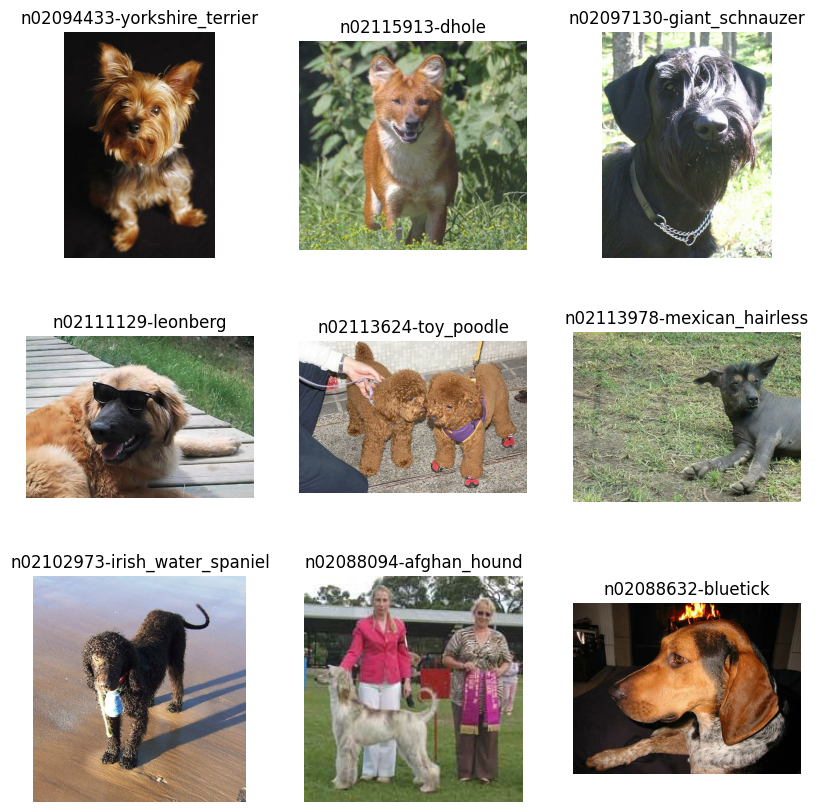

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\varun\tensorflow_datasets\stanford_dogs\0.2.0.incompleteMCJDMK\stanford_dogs-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\varun\tensorflow_datasets\stanford_dogs\0.2.0.incompleteMCJDMK\stanford_dogs-test.tfrecord*…

Dataset stanford_dogs downloaded and prepared to C:\Users\varun\tensorflow_datasets\stanford_dogs\0.2.0. Subsequent calls will reuse this data.


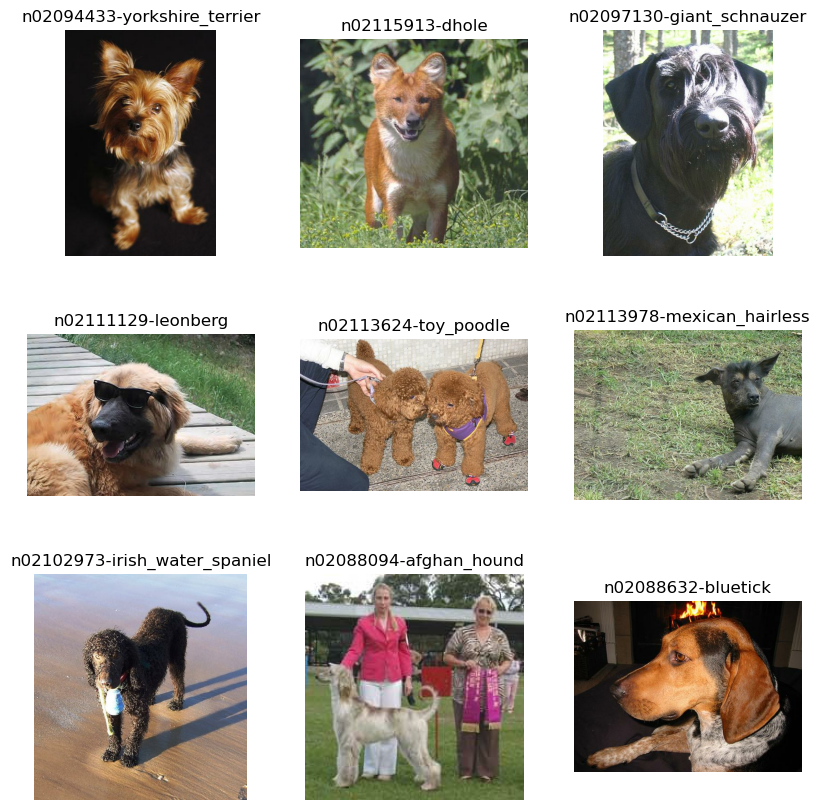

Epoch 1/10
375/375 [==============================] - 88s 230ms/step - loss: 3.0570 - accuracy: 0.2789 - val_loss: 1.5590 - val_accuracy: 0.5597
Epoch 2/10
375/375 [==============================] - 91s 244ms/step - loss: 2.0161 - accuracy: 0.4644 - val_loss: 1.3924 - val_accuracy: 0.5964
Epoch 3/10
375/375 [==============================] - 88s 235ms/step - loss: 1.7576 - accuracy: 0.5270 - val_loss: 1.3545 - val_accuracy: 0.6094
Epoch 4/10
375/375 [==============================] - 90s 239ms/step - loss: 1.6087 - accuracy: 0.5644 - val_loss: 1.3655 - val_accuracy: 0.6035
Epoch 5/10
375/375 [==============================] - 89s 239ms/step - loss: 1.4972 - accuracy: 0.5897 - val_loss: 1.3938 - val_accuracy: 0.6051
Epoch 6/10
375/375 [==============================] - 83s 222ms/step - loss: 1.4230 - accuracy: 0.6053 - val_loss: 1.3870 - val_accuracy: 0.6091
Epoch 7/10
375/375 [==============================] - 87s 232ms/step - loss: 1.3152 - accuracy: 0.6305 - val_loss: 1.3960 - val_ac

In [1]:

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the Stanford Dogs dataset
(train_data, test_data), ds_info = tfds.load('stanford_dogs', split=['train', 'test'], with_info=True, as_supervised=True)

# Display a few images and labels
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(ds_info.features["label"].int2str(label))
    plt.axis("off")
plt.show()


IMG_SIZE = 128  # or any other size you prefer

def resize_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train_data = train_data.map(resize_image)
test_data = test_data.map(resize_image)



# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

# Apply preprocessing
train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))
test_data = test_data.map(lambda x, y: (data_augmentation(x, training=False), y))

# Using a pre-trained model (e.g., MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Custom head for our dataset
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(120, activation='softmax')  # 120 classes in Stanford Dogs
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data.batch(32), validation_data=test_data.batch(32), epochs=10)


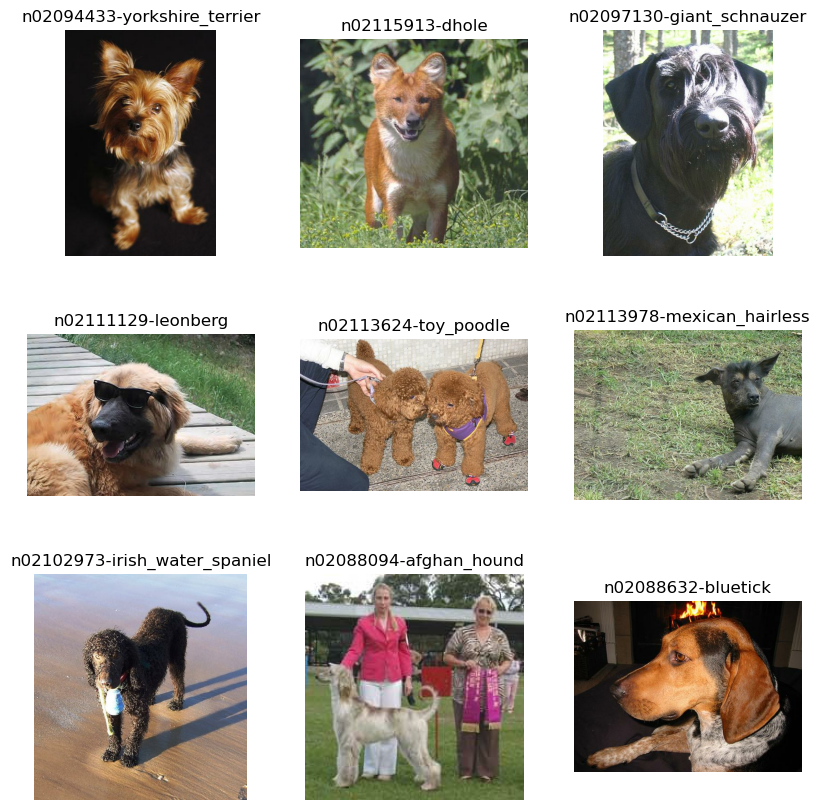

Epoch 1/10
  3/375 [..............................] - ETA: 49s - loss: 5.4001 - accuracy: 0.0104

KeyboardInterrupt: 

In [2]:

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the Stanford Dogs dataset
(train_data, test_data), ds_info = tfds.load('stanford_dogs', split=['train', 'test'], with_info=True, as_supervised=True)

# Display a few images and labels
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(ds_info.features["label"].int2str(label))
    plt.axis("off")
plt.show()


IMG_SIZE = 128  # or any other size you prefer

def resize_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train_data = train_data.map(resize_image)
test_data = test_data.map(resize_image)



# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

# Apply preprocessing
train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))
test_data = test_data.map(lambda x, y: (data_augmentation(x, training=False), y))

# Using a pre-trained model (e.g., MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Custom head for our dataset
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(120, activation='softmax')  # 120 classes in Stanford Dogs
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data.batch(32), validation_data=test_data.batch(32), epochs=10)


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Constants
IMG_SIZE = 128  # Define the image size for resizing


# Load the Stanford Dogs dataset with training, validation, and test splits
data_splits, ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:80%]', 'train[80%:]', 'test'],
    with_info=True,
    as_supervised=True
)

train_data, validation_data, test_data = data_splits[0], data_splits[1], data_splits[2]

# Data Preprocessing
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(image)
    return image, label

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

train_data = train_data.map(preprocess).map(lambda x, y: (data_augmentation(x, training=True), y)).batch(32).shuffle(1024).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_data = validation_data.map(preprocess).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_data = test_data.map(preprocess).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Model Building using Transfer Learning
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),  # Optional dense layer for more complexity
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_data, validation_data=validation_data, epochs=10)

# Optionally, you can save, evaluate further or visualize the results.


Epoch 1/10
300/300 [==============================] - 97s 260ms/step - loss: 3.2429 - accuracy: 0.2481 - val_loss: 1.7276 - val_accuracy: 0.5142


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Constants
IMG_SIZE = 128

# Load the Stanford Dogs dataset with training, validation, and test splits
data_splits, ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:80%]', 'train[80%:]', 'test'],
    with_info=True,
    as_supervised=True
)

train_data, validation_data, test_data = data_splits[0], data_splits[1], data_splits[2]

# Data Preprocessing
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(image)
    return image, label

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

train_data = train_data.map(preprocess).map(lambda x, y: (data_augmentation(x, training=True), y)).batch(32).shuffle(1024).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_data = validation_data.map(preprocess).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_data = test_data.map(preprocess).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Model Building using Transfer Learning
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer added for regularization
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Model
history = model.fit(train_data, validation_data=validation_data, epochs=10, callbacks=[early_stopping])


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
300/300 [==============================] - 176s 478ms/step - loss: 4.0692 - accuracy: 0.1099 - val_loss: 2.1959 - val_accuracy: 0.4271
Epoch 2/10
300/300 [==============================] - 173s 478ms/step - loss: 2.9759 - accuracy: 0.2658 - val_loss: 1.7434 - val_accuracy: 0.5288
Epoch 3/10
300/300 [==============================] - 174s 482ms/step - loss: 2.6830 - accuracy: 0.3186 - val_loss: 1.5999 - val_accuracy: 0.5342
Epoch 4/10
300/300 [==============================] - 165s 453ms/step - loss: 2.5298 - accuracy: 0.3468 - val_loss: 1.5145 - val_accuracy: 0.5650
Epoch 5/10
300/300 [==============================] - 164s 453ms/step - loss: 2.4209 - accuracy: 0.3659 - val_loss: 1.4768 - val_accuracy: 0.5750
Epoch 6/10
300/300 [==============================] - 162s 447ms/step - loss: 2.2816 - accuracy: 0.3985 - val_loss: 1.4565 - val_accuracy: 0.5867
Epoch 8/10
300/300 [==============================] - 162s 44

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Constants
IMG_SIZE = 224  # Adjusted for ResNet-50

# Load the Stanford Dogs dataset with training, validation, and test splits
data_splits, ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:80%]', 'train[80%:]', 'test'],
    with_info=True,
    as_supervised=True
)

train_data, validation_data, test_data = data_splits[0], data_splits[1], data_splits[2]

# Data Preprocessing
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

train_data = train_data.map(preprocess).map(lambda x, y: (data_augmentation(x, training=True), y)).batch(32).shuffle(1024).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_data = validation_data.map(preprocess).map(lambda x, y: (data_augmentation(x, training=False), y)).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_data = test_data.map(preprocess).map(lambda x, y: (data_augmentation(x, training=False), y)).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Model Building using Transfer Learning
base_model = tf.keras.applications.ResNet50(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_dog_classifier_model.h5',
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True,
                                                save_weights_only=False,
                                                mode='auto')
# Learning rate scheduling
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, mode='auto')

# Initial training with the frozen ResNet50 base
initial_epochs = 5
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=initial_epochs,
                    callbacks=[checkpoint, lr_scheduler])

# Fine-tuning by unfreezing some top layers of the base model
base_model.trainable = True
fine_tune_at = 150
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate for fine-tuning
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 10
history_fine = model.fit(train_data,
                         validation_data=validation_data,
                         epochs=initial_epochs + fine_tune_epochs,
                         initial_epoch=history.epoch[-1],
                         callbacks=[early_stopping, checkpoint, lr_scheduler])


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteMZGCJ8/stanford_dogs-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteMZGCJ8/stanford_dogs-test.tfrecord*...:   0%…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/5
300/300 [==============================] - ETA: 0s - loss: 4.9605 - accuracy: 0.0164
Epoch 1: val_loss improved from inf to 4.99590, saving model to best_dog_classifier_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 2453s 8s/step - loss: 4.9605 - accuracy: 0.0164 - val_loss: 4.9959 - val_accuracy: 0.0083 - lr: 0.0010
Epoch 2/5
 19/300 [>.............................] - ETA: 28:08 - loss: 4.8183 - accuracy: 0.0197

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Constants
IMG_SIZE = 600  # Adjusted for EfficientNetB7

# Load the Stanford Dogs dataset with training, validation, and test splits
data_splits, ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:80%]', 'train[80%:]', 'test'],
    with_info=True,
    as_supervised=True
)

train_data, validation_data, test_data = data_splits[0], data_splits[1], data_splits[2]

# Data Preprocessing
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(image)
    return image, label

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

train_data = (train_data
              .map(preprocess)
              .map(lambda x, y: (data_augmentation(x, training=True), y))
              .batch(32)
              .shuffle(1024)
              .prefetch(buffer_size=tf.data.experimental.AUTOTUNE))

validation_data = validation_data.map(preprocess).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_data = test_data.map(preprocess).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Model Building using Transfer Learning with EfficientNetB7
base_model = tf.keras.applications.EfficientNetB7(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Model
history = model.fit(train_data, validation_data=validation_data, epochs=10, callbacks=[early_stopping])


258076736/258076736 [==============================] - 1s 0us/step
Epoch 1/10
